In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
prices = pd.read_csv('../data/train_data.csv')

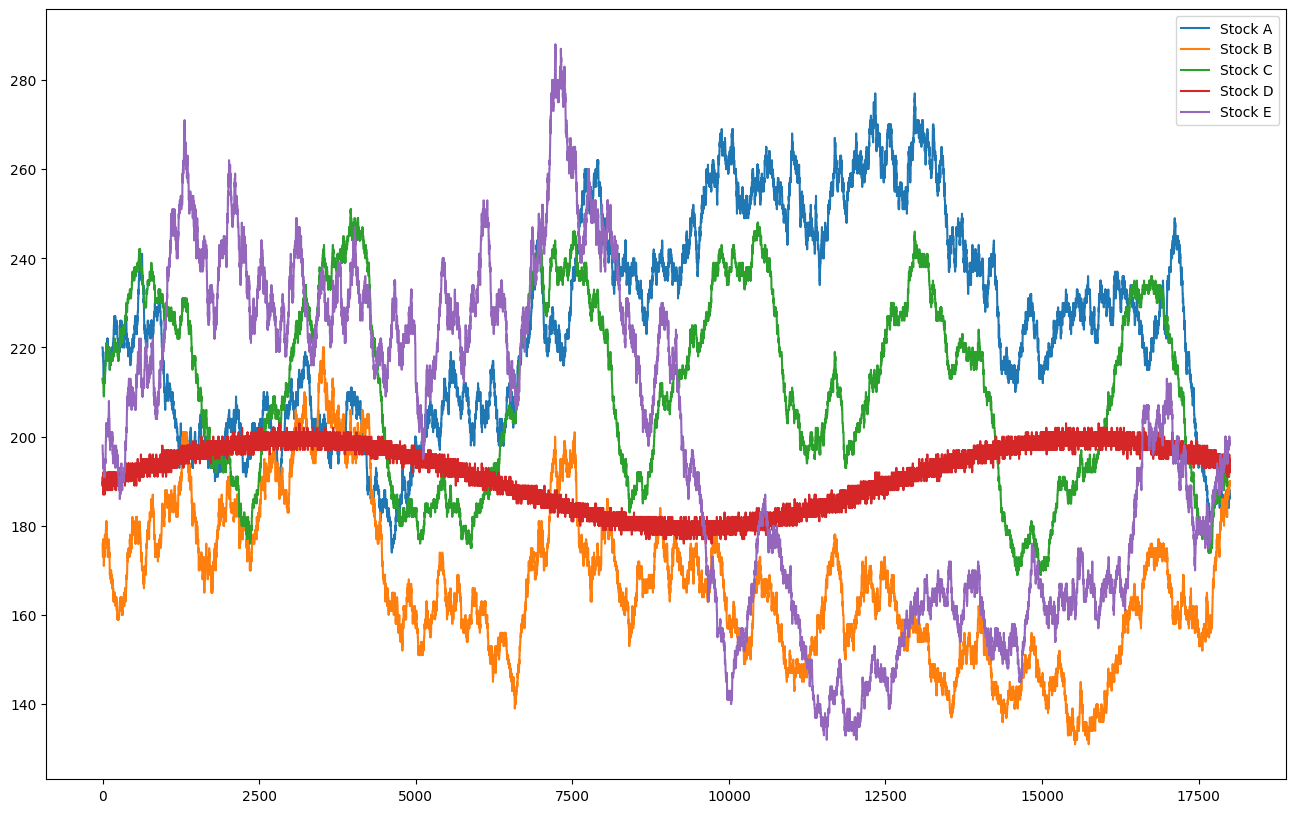

In [7]:
plt.figure(figsize=(16,10))
plt.plot(prices["StockA_Price"], label = 'Stock A')
plt.plot(prices["StockB_Price"], label = 'Stock B')
plt.plot(prices["StockC_Price"], label = 'Stock C')
plt.plot(prices["StockD_Price"], label = 'Stock D')
plt.plot(prices["StockE_Price"], label = 'Stock E')
plt.legend()

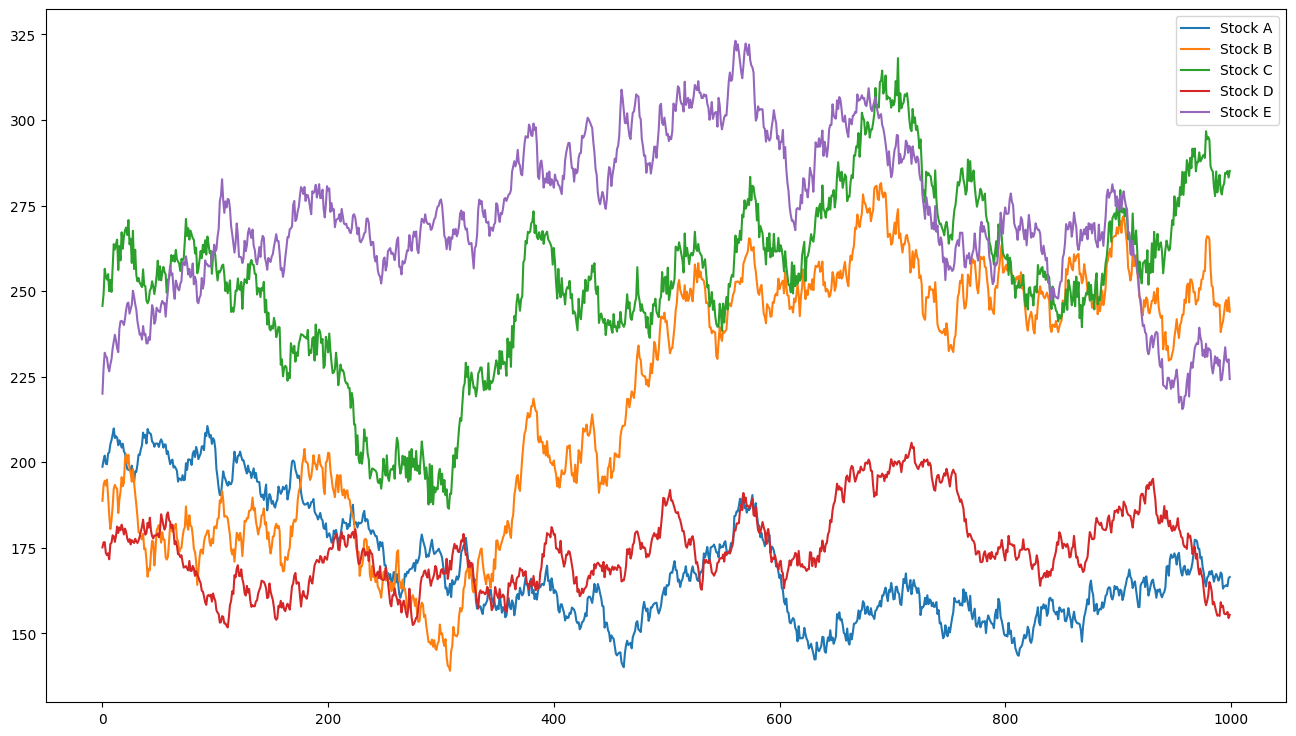

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(prices['StockA_Price'][:1000], label = 'Stock A')
plt.plot(prices["StockB_Price"][:1000], label = 'Stock B')
plt.plot(prices["StockC_Price"][:1000], label = 'Stock C')
plt.plot(prices["StockD_Price"][:1000], label = 'Stock D')
plt.plot(prices["StockE_Price"][:1000], label = 'Stock E')
plt.legend()
plt.show()

In [9]:
def timelag(stock, ticks):
    '''Returns a lagged version of the stock to be used in regression.
    stock: a letter (e.g. StockA_Price is A)
    ticks: how many ticks back to shift the stock'''
    return prices[f'Stock{stock}_Price'].shift(ticks)[ticks:]

In [10]:
def delta(stock, ticks):
    return timelag(stock, 0)[ticks:] - timelag(stock, ticks)

In [ ]:
from scipy.stats import pearsonr
pearsonr(delta("A", 10), delta("B", 10))

In [ ]:
from scipy.stats import linregress
from sklearn import linear_model

predictors = [('A', 10), ('B', 10)]
predict = ('A', 0)
y = timelag(*predict)
max_lag = len(y) - min([len(timelag(*p)) for p in predictors])
X = [(a := timelag(*p))[len(y)-len(a)-max_lag :] for p in predictors]
y = y[max_lag:]

linear_model.LinearRegression()

ValueError: too many values to unpack (expected 4)